In [10]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy.ndimage
from scipy import fftpack

In [11]:
image_file = fits.open('file:///C:/cygwin64/home/rehg98/WLconv_z1100.00_0580r.fits')
image_file.info()
type(image_file)

Filename: C:\Users\rehg98\.astropy\cache\download\py3\1c6f961384c074b1b25de6c1f4fd2344
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   (2048, 2048)   float32   


astropy.io.fits.hdu.hdulist.HDUList

In [12]:
image_data = image_file[0].data
image_data = image_data.astype(float)
print(image_data)

[[ 0.28772882  0.31463188  0.31120118 ..., -0.26744589 -0.26138833
  -0.19891326]
 [ 0.23843557  0.26356095  0.27608296 ..., -0.10312956 -0.11086034
  -0.06235358]
 [ 0.32085782  0.3036944   0.35584533 ..., -0.12078809 -0.05707451
  -0.07544205]
 ..., 
 [ 0.30768567  0.30357176  0.30380633 ..., -0.19853105 -0.15406299
  -0.17564408]
 [ 0.16823567  0.13827965  0.25008214 ..., -0.21506804 -0.12519895
  -0.26080811]
 [ 0.19998959  0.20467333  0.2182963  ..., -0.25283489 -0.12982941
  -0.30584782]]


In [13]:
F = fftpack.fftshift(fftpack.fft2(image_data))
psd2D = np.abs(F)**2

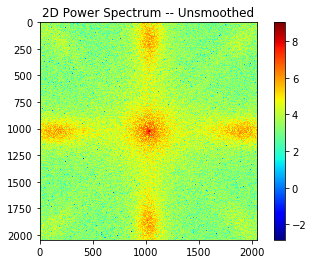

In [117]:
plt.imshow(np.log10(psd2D), cmap=plt.cm.jet)
plt.title("2D Power Spectrum -- Unsmoothed")
plt.colorbar()
plt.show()

In [15]:
smooth_data = scipy.ndimage.filters.gaussian_filter(image_data, 100)
F_smooth = fftpack.fftshift(fftpack.fft2(smooth_data))
psd2D_smooth = np.abs(F_smooth)**2

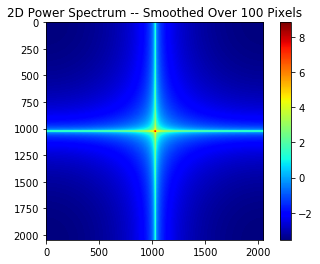

In [116]:
plt.imshow(np.log10(psd2D_smooth), cmap=plt.cm.jet)
plt.title("2D Power Spectrum -- Smoothed Over 100 Pixels")
plt.colorbar()
plt.show()

In [113]:
def power1D(image):
    #help from Jessica Lu's radialProfile module (http://www.astrobetter.com/wiki/tiki-index.php?page=python_radial_profiles)
    y, x = np.indices(image.shape)
    center = np.array([(x.max() - x.min()) / 2., (y.max() - y.min()) / 2.])
    
    radii = np.hypot(x - center[0], y - center[1])
    sorted_radii_indices = np.argsort(radii.flat)
    sorted_radii = radii.flat[sorted_radii_indices]
    sorted_pixels = image.flat[sorted_radii_indices]
    integer_radii = sorted_radii.astype(int)
    
    delta_r = integer_radii[1:] - integer_radii[:-1]
    radius_changes = np.where(delta_r)[0]
    bin_content = radius_changes[1:] - radius_changes[:-1]
    bin_content = np.insert(bin_content, 0, radius_changes[0] + 1) #missing <1-radius bin in Lu's code?
    
    sums = np.cumsum(sorted_pixels, dtype = float)
    bin_totals = sums[radius_changes[1:]] - sums[radius_changes[:-1]]
    bin_totals = np.insert(bin_totals, 0, sums[radius_changes[0]])
    
    
    bin_averages = bin_totals / bin_content
    return bin_averages

[  4.21877395e+08   4.17205362e+08   4.42400398e+08 ...,   9.54054673e+03
   5.03744427e+03   9.33974358e+03]


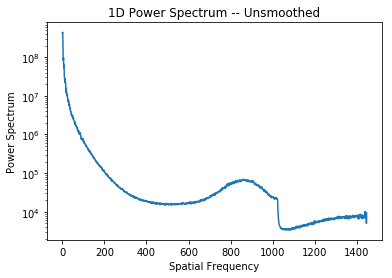

In [114]:
psd1D = power1D(psd2D)
print(psd1D)
plt.semilogy(psd1D)
plt.title('1D Power Spectrum -- Unsmoothed')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power Spectrum')
plt.show()

[  3.73702686e+08   3.32488623e+08   2.44984058e+08 ...,   2.92205811e-04
   2.92062759e-04   2.91919708e-04]


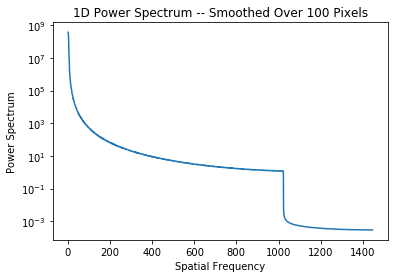

In [115]:
psd1D_smooth = power1D(psd2D_smooth)
print(psd1D_smooth)
plt.semilogy(psd1D_smooth)
plt.title('1D Power Spectrum -- Smoothed Over 100 Pixels')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power Spectrum')
plt.show()